In [ ]:
cd /content/drive/MyDrive/Deevia/TannerGilbert

/content/drive/MyDrive/Deevia/TannerGilbert


##Clone the repository

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 49356 (delta 26), reused 34 (delta 3), pack-reused 49299
Receiving objects: 100% (49356/49356), 558.62 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (34006/34006), done.
Checking out files: 100% (2196/2196), done.


In [ ]:
cd /content/drive/MyDrive/Deevia/TannerGilbert/models/research

/content/drive/MyDrive/Deevia/TannerGilbert/models/research


##Install dependencies

In [ ]:
# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/drive/My Drive/Deevia/TannerGilbert/models/research
     |████████████████████████████████| 8.9MB 11.1MB/s 
     |████████████████████████████████| 358kB 35.2MB/s 
     |████████████████████████████████| 849kB 39.8MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 829kB 41.0MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 153kB 35.4MB/s 
     |████████████████████████████████| 2.0MB 40.5MB/s 
     |████████████████████████████████| 63.8MB 116kB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 36.7MB 131kB/s 
     |████████████████████████████████| 1.1MB 47.8MB/s 
     |████████████████████████████████| 174kB 48.4MB/s 
     |████████████████████████████████| 112kB 52.5MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=160

In [ ]:
pwd

'/content/drive/My Drive/Deevia/TannerGilbert/models/research'

##Test Installation

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2020-12-19 08:08:06.353063: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2020-12-19 08:08:10.870964: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-19 08:08:10.906057: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-19 08:08:10.980087: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-12-19 08:08:10.980153: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9cbf91c0ea29): /proc/driver/nvidia/version does not exist
2020-12-19 08:08:10.980772: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA device

In [ ]:
cd /content/drive/MyDrive/Deevia/TannerGilbert/models/research/object_detection/

/content/drive/MyDrive/Deevia/TannerGilbert/models/research/object_detection


### Converting .xml to .csv

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    for folder in ['train', 'test']:
        image_path = os.path.join(os.getcwd(), ('images/' + folder))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv(('images/'+folder+'_labels.csv'), index=None)
    print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.


##Generate tfrecord files

In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

2020-12-19 08:25:31.487576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/drive/My Drive/Deevia/TannerGilbert/models/research/object_detection/train.record


In [ ]:
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

2020-12-19 08:27:05.689624: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/drive/MyDrive/Deevia/TannerGilbert/models/research/object_detection/test.record


In [ ]:
cd /content/drive/MyDrive/Deevia/TannerGilbert/models/research/object_detection

/content/drive/MyDrive/Deevia/TannerGilbert/models/research/object_detection


##Train the model

In [ ]:
!python model_main_tf2.py \
    --pipeline_config_path=/content/drive/MyDrive/Deevia/TannerGilbert/models/research/training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config \
    --model_dir=/content/drive/MyDrive/Deevia/TannerGilbert/models/research/training \
    --alsologtostderr

2020-12-19 14:59:34.177256: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2020-12-19 14:59:37.536919: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-19 14:59:37.537893: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-19 14:59:37.548281: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-12-19 14:59:37.548342: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c13f768831ab): /proc/driver/nvidia/version does not exist
2020-12-19 14:59:37.548927: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W1219 14:59:37.549626 140135075743616 cross_device_ops.py:1321] There are no

##Export model to .pb file

In [ ]:
!python exporter_main_v2.py \
    --trained_checkpoint_dir=/content/drive/MyDrive/Deevia/TannerGilbert/models/research/training \
    --pipeline_config_path=/content/drive/MyDrive/Deevia/TannerGilbert/models/research/training/ssd_efficientdet_d0_512x512_coco17_tpu-8.config \
    --output_directory inference_graph

2020-12-19 16:11:06.039331: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2020-12-19 16:11:09.131871: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-12-19 16:11:09.132880: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2020-12-19 16:11:09.143238: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-12-19 16:11:09.143291: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c13f768831ab): /proc/driver/nvidia/version does not exist
2020-12-19 16:11:09.143907: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
I1219 16:11:09.156106 139749760800640 ssd_efficientnet_bifpn_feature_extract

##Testing

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from protos import string_int_label_map_pb2
%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
from object_detection.utils import label_map_util
category_index = label_map_util.create_category_index_from_labelmap('/content/drive/MyDrive/Deevia/TannerGilbert/models/research/training/label_map.pbtxt', use_display_name=True)

In [ ]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/drive/MyDrive/Deevia/TannerGilbert/models/research/object_detection/inference_graph/saved_model')

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

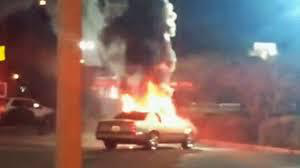

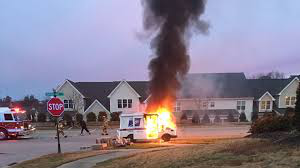

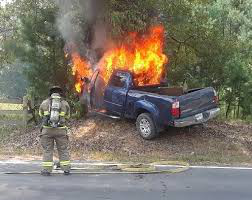

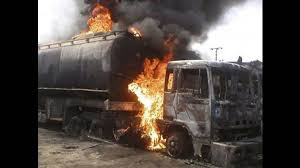

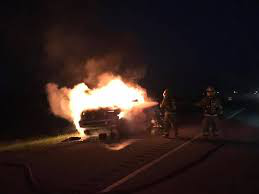

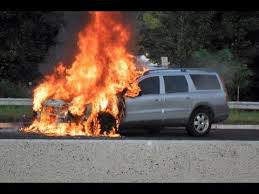

In [ ]:
for image_path in glob.glob('/content/drive/MyDrive/Deevia/TannerGilbert/models/research/object_detection/images/try/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))